In [113]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from ipywidgets import widgets


%matplotlib inline

In [116]:
x = -np.arange(200)
y = 0
z = 0

a = 50
E = 10
epsilon = .3

Lambda_s = 3

c_vol_f = 4.2e6
c_vol_s = 2.52e6

Q = 150 / 86400


a2 = a*a

In [117]:
f = epsilon * c_vol_f / ( epsilon * c_vol_f + (1 - epsilon) * c_vol_s)
eta = np.arctan(2 * a * y / (a2 - x*x - y*y))
xi = .5 * np.log(((x-a)*(x-a) + y*y) / ((x+a)*(x+a) + y*y))

#print('f:   {}'.format(f))
#print('eta: {}'.format(eta))
#print('xi:  {}'.format(xi))

/home/jens/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/home/jens/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


In [118]:
if True: #np.abs(np.abs(np.cos(eta)) - 1) < 1.e-10:
    term1 = np.sinh(xi) /(np.cosh(xi) + np.cos(eta)) * (1 + np.cos(eta) /(np.cosh(xi) + np.cos(eta)) )
    factor = (1 - term1) 
    I = factor * 4 * np.pi * E * a2 * f / (3*Q)
    #print('Is true')
else:
    term1 = np.arctan(np.tan(eta/2)*(np.tanh(xi/2)-1) / (1+np.tanh(xi/2) * np.tan(eta/2) * np.tan(eta/2) ) ) \
    * 2 *  np.cos(eta) / np.sin(eta) 
    term2 = - np.sinh(xi) /(np.cosh(xi) + np.cos(eta))
    
    factor = (1 + term1 + term2) / np.sin(eta)
    I = factor * 4 * np.pi * E * a2 * f / Q
    
# I

/home/jens/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in sqrt


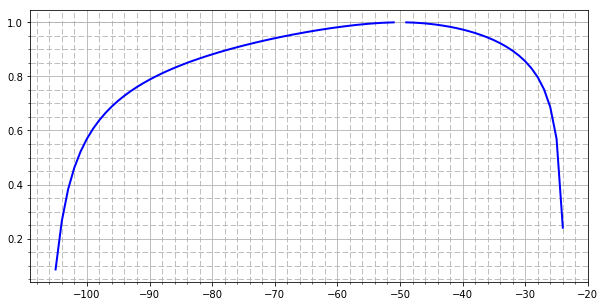

In [119]:
def calc_temperature(_t):

    term1 = I * np.sqrt(Lambda_s * c_vol_s) / (E * (epsilon*c_vol_f + (1-epsilon)*c_vol_s))
    term2 = np.sqrt(c_vol_s / Lambda_s) * z

    _T = special.erfc((1. / (2 * np.sqrt(_t-I)) ) * (term1 + term2))

    return _T



def do_plot(_t):

    _T = calc_temperature(_t*86400)
    plt.figure(1, figsize=(10, 5))

    ax = plt.subplot(111)
    ax.plot(x, _T, color='blue', linewidth=2, label='analytical')
    #ax.set_ylim([-.1, 1.1])

    ax.minorticks_on()
    ax.grid(b=True, which='major', linestyle='-')
    ax.grid(b=True, which='minor', linestyle='--')

    #print(_T)
    
widget_return = widgets.interact(do_plot, 
                                 # borehole diameter
                                 _t=widgets.IntSlider(value=100, min=0, max=1000, 
                                              step=10)
                                
       
                                )
